In [4]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.callbacks import History 

In [15]:
path1=r"D:\Class Dataset\Projects\ParasiteEgg_Classification\training_set"
cate=["Ascaris lumbricoides","Capillaria philippinensis","Enterobius vermicularis","Fasciolopsis buski","Hookworm egg","Hymenolepis diminuta","Hymenolepis nana","Opisthorchis viverrine","Paragonimus spp",
"Taenia spp egg","Trichuris trichiura"]

In [5]:
path2=r"D:\Class Dataset\Projects\ParasiteEgg_Classification\testing_set"
cate=["Ascaris lumbricoides","Capillaria philippinensis","Enterobius vermicularis","Fasciolopsis buski","Hookworm egg","Hymenolepis diminuta","Hymenolepis nana","Opisthorchis viverrine","Paragonimus spp",
"Taenia spp egg","Trichuris trichiura"]

In [17]:
image_size=200
training_image=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))
        training_image.append([image_array,label])

In [6]:
image_size=200
testing_image=[]
for i in cate:
    folders=os.path.join(path2,i)
    label=cate.index(i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))
        testing_image.append([image_array,label])

In [19]:
# lets access the images

In [20]:
len(training_image)

8900

In [7]:
len(testing_image)

2200

In [22]:
training_image[800][1]

1

In [8]:
testing_image[800][1]

4

In [24]:
np.random.shuffle(training_image)

In [9]:
np.random.shuffle(testing_image)

In [27]:
#till this point x and y values are together
X_train=[]
Y_train=[]
for X_values,labels in training_image:
    X_train.append(X_values)
    Y_train.append(labels)

In [10]:
#till this point x and y values are together
X_test=[]
Y_test=[]
for X_values,labels in testing_image:
    X_test.append(X_values)
    Y_test.append(labels)

In [11]:
2200/8

275.0

In [12]:
X=X_test
Y=Y_test
X_train=X[0:1925]
Y_train=Y[0:1925]
X_test=X[1925::]
Y_test=Y[1925::]

In [13]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)


In [14]:
#Normalising the data by dividing the x test and train by max pixel size ==255
X_train=(X_train/255)
X_test=(X_test/255)

In [23]:
len(X_train[2])

200

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [16]:
from tensorflow.keras.utils import to_categorical

In [25]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(11,activation="softmax"))
adam=tf.keras.optimizers.Adam()

model.compile(optimizer=adam,loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [27]:
model1=model.fit(X_train,Y_train,epochs=20,validation_split=0.2,batch_size=32)

Epoch 1/20
49/49 [==============================] - 27s 557ms/step - loss: 1.1717 - accuracy: 0.5766 - val_loss: 1.5777 - val_accuracy: 0.4597
Epoch 2/20
49/49 [==============================] - 27s 554ms/step - loss: 0.6567 - accuracy: 0.7942 - val_loss: 1.5341 - val_accuracy: 0.4883
Epoch 3/20
49/49 [==============================] - 29s 598ms/step - loss: 0.3685 - accuracy: 0.8948 - val_loss: 1.5544 - val_accuracy: 0.4961
Epoch 4/20
49/49 [==============================] - 31s 633ms/step - loss: 0.2287 - accuracy: 0.9331 - val_loss: 1.9155 - val_accuracy: 0.4442
Epoch 5/20
49/49 [==============================] - 30s 617ms/step - loss: 0.1199 - accuracy: 0.9701 - val_loss: 1.7742 - val_accuracy: 0.5039
Epoch 6/20
49/49 [==============================] - 30s 614ms/step - loss: 0.0708 - accuracy: 0.9838 - val_loss: 1.9887 - val_accuracy: 0.4727
Epoch 7/20
49/49 [==============================] - 30s 618ms/step - loss: 0.0383 - accuracy: 0.9942 - val_loss: 1.9063 - val_accuracy: 0.4961

In [28]:
pred_value=model.predict(X_test)
pred_value      #it gives prediction in probabilites for all 10 classes for test data

9/9 [==============================] - 1s 91ms/step


array([[1.60244596e-03, 2.73891781e-02, 4.77165371e-01, ...,
        4.26279684e-07, 2.43934169e-02, 1.41635553e-06],
       [1.46376726e-03, 8.66252482e-01, 1.28778860e-01, ...,
        7.70022979e-09, 3.85833191e-05, 5.49319899e-04],
       [5.07282093e-02, 1.56747818e-01, 8.13322514e-03, ...,
        8.17750515e-06, 5.50349355e-01, 7.69532425e-03],
       ...,
       [9.62001324e-01, 9.23064596e-04, 5.76958018e-06, ...,
        1.39151746e-03, 9.00092814e-03, 1.88462815e-04],
       [7.75025111e-09, 1.54137272e-10, 5.89666640e-12, ...,
        9.99996424e-01, 8.37800052e-10, 3.85370512e-12],
       [9.59870100e-01, 5.44270563e-07, 1.05230845e-06, ...,
        1.72199921e-09, 1.30258715e-02, 9.36411787e-04]], dtype=float32)

In [29]:
#lets convert probabilty to classes to make confusion matrix

In [30]:
pred_classes=np.argmax(pred_value,axis=1)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
tab=confusion_matrix(Y_test,pred_classes)
tab

array([[15,  3,  4,  1,  0,  0,  0,  0,  0,  2,  1],
       [ 1, 13,  8,  0,  1,  0,  1,  1,  0,  2,  0],
       [ 2,  6, 11,  1,  0,  0,  0,  1,  1,  1,  2],
       [ 1,  2,  0,  7,  1,  0,  0,  3,  0,  2,  5],
       [ 0,  2,  0,  2, 10,  0,  1,  2,  1,  2,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  1, 15,  0,  1,  0,  0],
       [ 3,  2,  1,  0,  0,  0,  0, 12,  1,  1,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 1,  4,  1,  2,  0,  0,  0,  5,  0,  5,  5],
       [ 1,  5,  4,  2,  0,  0,  1,  2,  0,  0, 15]], dtype=int64)

In [33]:
accuracy=accuracy_score(Y_test,pred_classes)*100
accuracy

57.81818181818181

In [34]:
model1.history

{'loss': [1.1716581583023071,
  0.6566906571388245,
  0.36851778626441956,
  0.22865329682826996,
  0.11987101286649704,
  0.07082300633192062,
  0.038272831588983536,
  0.024734923616051674,
  0.020382218062877655,
  0.02225777693092823,
  0.033965613692998886,
  0.025701109319925308,
  0.019977092742919922,
  0.012261919677257538,
  0.0675174668431282,
  0.01899949461221695,
  0.10336777567863464,
  0.037862662225961685,
  0.018250318244099617,
  0.017277127131819725],
 'accuracy': [0.5766233801841736,
  0.7941558361053467,
  0.8948051929473877,
  0.9331169128417969,
  0.9701298475265503,
  0.9837662577629089,
  0.9941558241844177,
  0.9980519413948059,
  0.9980519413948059,
  0.9993506669998169,
  0.9967532753944397,
  0.9967532753944397,
  0.9961038827896118,
  0.9980519413948059,
  0.9863636493682861,
  0.9967532753944397,
  0.982467532157898,
  0.9941558241844177,
  0.9974026083946228,
  0.9980519413948059],
 'val_loss': [1.5777482986450195,
  1.5340988636016846,
  1.554388403892

In [35]:
df1=pd.DataFrame(model1.history)

In [36]:
df1

,loss,accuracy,val_loss,val_accuracy
0,1.171658,0.576623,1.577748,0.459740
1,0.656691,0.794156,1.534099,0.488312
2,0.368518,0.894805,1.554388,0.496104
3,0.228653,0.933117,1.915514,0.444156
4,0.119871,0.970130,1.774210,0.503896
5,0.070823,0.983766,1.988732,0.472727
6,0.038273,0.994156,1.906327,0.496104
7,0.024735,0.998052,1.858102,0.535065
8,0.020382,0.998052,2.029606,0.511688
9,0.022258,0.999351,2.147798,0.480519


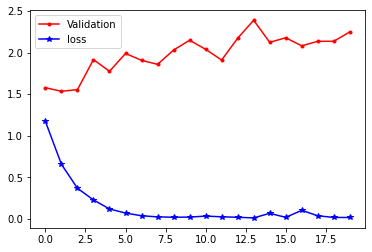

In [37]:
plt.plot(df1.val_loss,color="r",marker=".",label="Validation")
plt.plot(df1.loss,color="b",marker="*",label="loss")
plt.legend()